# COGS 108 - Final Project

## Group Members
- A12946203 (Coleen Wu)
- A12657162 (Giovanni Aguirre)
- A12889508 (Kaye Geronilla)
- A13104357 (Cameron Gropp)

## Research Question

How do video game sales correlate with year of release, genre, region, and review scores?

We hypothesize that sales have a positive correlation with review scores. Certain genres have higher sales than others, and different regions have different trends.

In answering this question, our data analysis will provide statistical evidence on what genres of games are popular per region, which regions have different sales trends, and the success of different platforms. 

In this project, we will try to answer the research question by:
- using pre-existing data on video game sales with ratings
- clean up the data by determining what is irrelevant, explaining why that is the case
- use appropriate statistical tests to help support our hypothesis
- understand what these statistical tests mean in terms of our data

# Dataset
- Dataset Name: Video Game Sales with Ratings
- Link to the dataset: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
- Number of observations: 16719

Contains information on PC and console video games, including name, platform, year of release, genre, publisher, sales in different regions, critic and user scores, rating, and developer.

The data is arranged from most sold game globally to least sold game globally. The sales numbers are also in millions. The critic score is out of 100 and the user score is out of 10. The rating is not the overall score, but what the Entertainment Software Rating Board (ESRB) rated it, which is an organization that assigns age and content ratings for video games. The ESRB rating can range from E (for everyone) to M (for mature).

## Part 1: Loading & Cleaning Data

In [234]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import normaltest
import scipy.stats as stats

In [235]:
# Import the data into a pandas dataframe

df_raw = pd.read_csv("VideoGamesSales.csv")

In [236]:
# Check if data was imported correctly

assert isinstance(df_raw, pd.DataFrame)
df_raw

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
# Drop columns that are not in the scope of our analysis

df = df_raw.drop(['Publisher', 'Other_Sales', 'Critic_Count', 'User_Count', 'Rating'], axis=1)

In [238]:
df

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,User_Score,Developer
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,82.53,76.0,8,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,35.52,82.0,8.3,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,32.77,80.0,8,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,31.37,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,30.26,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,29.80,89.0,8.5,Nintendo
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,28.92,58.0,6.6,Nintendo
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,28.32,87.0,8.4,Nintendo
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,28.31,NaN,NaN,NaN


In [239]:
""" Remove all games from 2016 - this dataset was taken at the end of 2016, 
    so some of the games have not been out long enough to have gathered enough data. """

df = df[df['Year_of_Release'] <= 2015]

In [240]:
""" Drop all games with <= .05 million global sales, as they are not notable 
    enough have reflective critic or user review scores. We will also drop all
    games with <= 10,000 sales in any region to account for games not released
    in all regions."""

df = df[(df['Global_Sales'] > 0.05) & (df['NA_Sales'] > 0.01) & (df['EU_Sales'] > 0.01) & (df['JP_Sales'] > 0.01)]

In [241]:
df

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,User_Score,Developer
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,82.53,76.0,8,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,35.52,82.0,8.3,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,32.77,80.0,8,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,31.37,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,30.26,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,29.80,89.0,8.5,Nintendo
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,28.92,58.0,6.6,Nintendo
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,28.32,87.0,8.4,Nintendo
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,28.31,NaN,NaN,NaN


In [242]:
""" Drop all games for un-notable platforms (platforms which have <= 5 games). """

platform_counts = df['Platform'].value_counts()
platforms_to_drop = platform_counts[platform_counts <= 5].keys().tolist()
df = df[~df['Platform'].isin(platforms_to_drop)]

In [243]:
df

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,User_Score,Developer
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,82.53,76.0,8,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,35.52,82.0,8.3,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,32.77,80.0,8,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,31.37,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,30.26,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,29.80,89.0,8.5,Nintendo
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,28.92,58.0,6.6,Nintendo
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,28.32,87.0,8.4,Nintendo
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,28.31,NaN,NaN,NaN


In [244]:
""" We need to drop all rows with NaNs in the columns "Name","Platform","Year_of_Release","Genre","Global_Sales" 
    because these are our areas of interest and we need these values because we will need them in our analysis 
    We do not drop rows with NaN in the review score columns because older games do not have review 
    scores due to reviews not being well tracked at the time. We will do additional data cleaning when 
    comparing sales vs review scores."""

df = df.dropna(subset=["Name","Platform","Year_of_Release","Genre","Global_Sales"])

In [245]:
df

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,User_Score,Developer
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,82.53,76.0,8,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,35.52,82.0,8.3,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,32.77,80.0,8,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,31.37,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,30.26,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,29.80,89.0,8.5,Nintendo
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,28.92,58.0,6.6,Nintendo
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,28.32,87.0,8.4,Nintendo
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,28.31,NaN,NaN,NaN


## Data Visualization

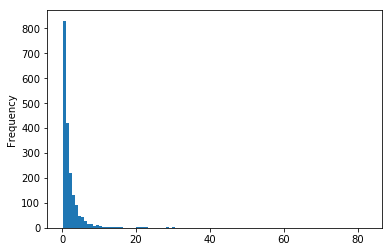

In [246]:
df['Global_Sales'].plot(kind='hist', bins=100)

In this visualization, we see the data is heavily skewed to the right, with strong outliers present. Games with extremely high sales such as Wii Sports and Super Mario Bros. strech the graph so most of the games are within the same bin of the histogram. 
Investigating these outliers, we realized that several top selling games were included in bundles with hardware. This could significantly affect the number of sales for that game.

We see that one value is heavily skewed to the right, which is Wii Sports. This game was bundled with the Wii, one of the best-selling consoles of all time, which means that its sales are not an accurate reflection of the demand. Therefore, we will remove all games which were bundled with their respective consoles.

In [247]:
df = df[(df['Name'] != "Wii Sports")& (df['Name'] != "Tetris") & (df['Name'] != "Wii Sports Resort")& (df['Name'] != "Wii Play")& (df['Name'] != "Duck Hunt") & (df['Name'] != "Kinect Adventures!") & (df['Name'] != "Wii Fit Plus") & (df['Name'] != "Super Mario World")]

We will take the log10 of our data in order to try to normalize the distribution and to reduce skew of the data

In [248]:
# Take the log10 of all our sales data

df.loc[:,'Global_Sales'] = np.log10(df['Global_Sales'])
df.loc[:,'NA_Sales'] = np.log10(df['NA_Sales'])
df.loc[:,'EU_Sales'] = np.log10(df['EU_Sales'])
df.loc[:,'JP_Sales'] = np.log10(df['JP_Sales'])

C:\Users\kayeg\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


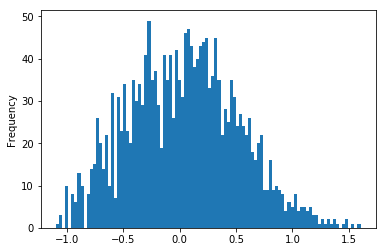

In [249]:
df['Global_Sales'].plot(kind='hist', bins=100)

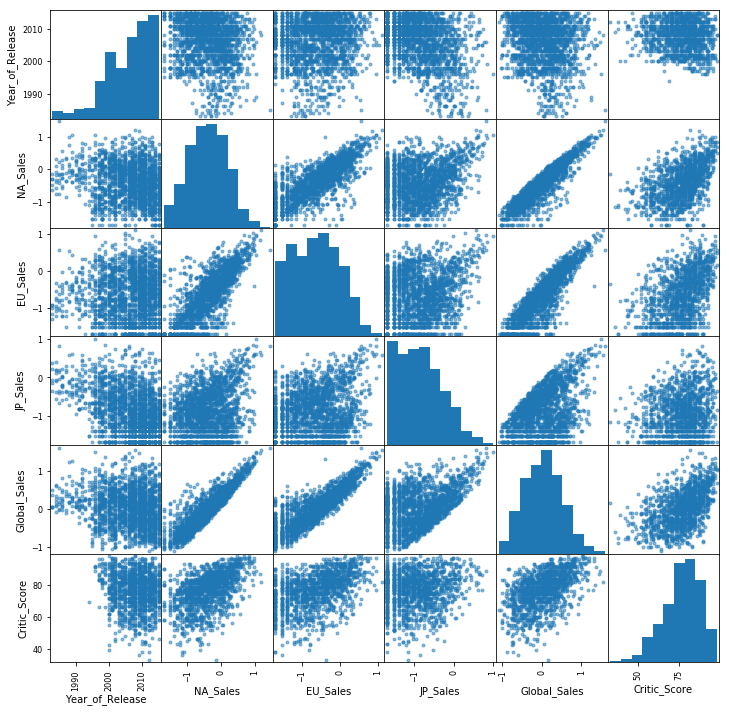

In [250]:
fig = pd.scatter_matrix(df, figsize=(12,12))

In this scatter plot, we see that there is at least some correlation between global sales, with NA Sales, EU Sales and JP Sales, however there seems to be less of a correlation between JP Sales and Global Sale. We will investigate this.  #TODO (review this)

We also discover that User Scores were not being processed correctly.

In [251]:
print("User Score type: ", type(df.iloc[1]['User_Score']))

User Score type:  <class 'str'>


On further inspection, the user scores were actually inputted as strings, which means we need to re-typecast them as integers. We also need to remove the non-integer values in the User Scores section. The user scores are also on a scale out of 10, while critic scores are out of 100, so we will need to convert the scale.

In [252]:
# Convert all the string values in User Scores to integers

user_score_which_num = ~(df['User_Score'].str.isalpha().fillna(value=False))
df['User_Score'] = df['User_Score'][user_score_which_num].astype(float)*10

C:\Users\kayeg\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [253]:
df

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,User_Score,Developer
1,Super Mario Bros.,NES,1985.0,Platform,1.463594,0.553883,0.833147,1.604658,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,1.195346,1.105851,0.578639,1.550473,82.0,83.0,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,1.051924,0.948902,1.009451,1.496515,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,1.052309,0.960946,0.812913,1.474216,89.0,85.0,Nintendo
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,1.159567,0.841359,0.672098,1.452093,87.0,84.0,Nintendo
10,Nintendogs,DS,2005.0,Simulation,0.956649,1.039414,0.285557,1.392169,NaN,NaN,NaN
11,Mario Kart DS,DS,2005.0,Racing,0.987219,0.873321,0.615950,1.365675,91.0,86.0,Nintendo
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,0.954243,0.790988,0.857332,1.363612,NaN,NaN,NaN
13,Wii Fit,Wii,2007.0,Sports,0.950365,0.904716,0.556303,1.356026,80.0,77.0,Nintendo
16,Grand Theft Auto V,PS3,2013.0,Action,0.846337,0.958564,-0.008774,1.323046,97.0,82.0,Rockstar North


## Data Analysis

We would like to analyze the relationships between region, global sales, and platform.

We did not previously remove the NaN values in the Critic and User Scores columns, so we will remove those rows in our analysis of the correlations involving critic and user scores.

In [254]:
df_scores_clean = df.dropna(subset=["Critic_Score","User_Score"])

In [255]:
df_scores_clean

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,User_Score,Developer
2,Mario Kart Wii,Wii,2008.0,Racing,1.195346,1.105851,0.578639,1.550473,82.0,83.0,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,1.052309,0.960946,0.812913,1.474216,89.0,85.0,Nintendo
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,1.159567,0.841359,0.672098,1.452093,87.0,84.0,Nintendo
11,Mario Kart DS,DS,2005.0,Racing,0.987219,0.873321,0.615950,1.365675,91.0,86.0,Nintendo
13,Wii Fit,Wii,2007.0,Sports,0.950365,0.904716,0.556303,1.356026,80.0,77.0,Nintendo
16,Grand Theft Auto V,PS3,2013.0,Action,0.846337,0.958564,-0.008774,1.323046,97.0,82.0,Rockstar North
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,0.974512,-0.397940,-0.387216,1.318272,95.0,90.0,Rockstar North
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,0.675778,0.963788,0.619093,1.304275,77.0,79.0,Nintendo
23,Grand Theft Auto V,X360,2013.0,Action,0.984977,0.710963,-1.221849,1.211388,97.0,81.0,Rockstar North
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,0.924796,0.739572,-0.327902,1.208173,95.0,87.0,Rockstar North


In [256]:
# What is the average critic score, compared to the average user score?

critic_avg = np.mean(df_scores_clean['Critic_Score'])
user_avg = np.mean(df_scores_clean['User_Score'])

In [257]:
# Print out the average scores
print('Average critic score: \t', critic_avg)
print('Average user score: \t', user_avg)

Average critic score: 	 76.61567732115677
Average user score: 	 76.73668188736681


There is no notable difference between the average critic and user scores, so we can weight both equally in making our analyses.

### Sales by Region vs. Global Sales

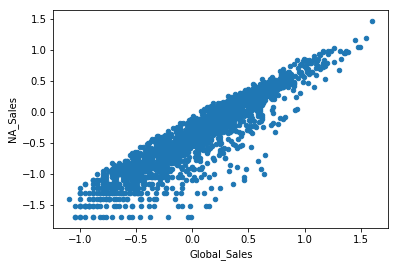

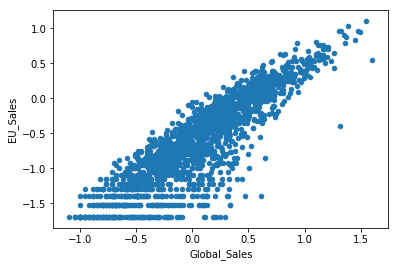

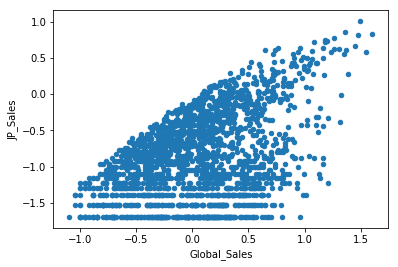

In [258]:
# Scatter plots of NA, EU, and JP sales vs global sales.
NAvsGlobal =df.plot(x="Global_Sales", y = "NA_Sales",kind='scatter')
EUvsGlobal =df.plot(x="Global_Sales", y = "EU_Sales",kind='scatter')
JPvsGlobal = df.plot(x="Global_Sales", y = "JP_Sales",kind='scatter')

As expected, there is a positive association for each of the graphs, but there is a noticeable difference in the plot of Japan sales vs global sales.

Let's investigate the correlation of these variables.

In [259]:
NAcorr = df.NA_Sales.corr(df.Global_Sales)
EUcorr = df.EU_Sales.corr(df.Global_Sales)
JPcorr = df.JP_Sales.corr(df.Global_Sales)

print("NA vs Global Sales Correlation is: " , NAcorr)
print("EU vs Global Sales Correlation is: " , EUcorr)
print("JP vs Global Sales Correlation is: " , JPcorr)

NA vs Global Sales Correlation is:  0.907677224585
EU vs Global Sales Correlation is:  0.873526265815
JP vs Global Sales Correlation is:  0.437670152844


While NA and EU vs Global correlations are similarly high, JP correlation is much lower. 
Let's investigate this further by checking the correlations between sales of different regions.

In [260]:
NAvEUcorr = df.NA_Sales.corr(df.EU_Sales)
print("NA vs EU Sales Correlation is: " , NAvEUcorr)
print("This correlation is strong, demonstrating that when games sell well in NA, they tend to sell well in EU.")
print()
NAvJPcorr = df.NA_Sales.corr(df.JP_Sales)
print("NA vs JP Sales Correlation is: " , NAvJPcorr)
print("This correlation is much weaker, demonstrating less of a relationship between sales in NA and JP.")

NA vs EU Sales Correlation is:  0.777576896671
This correlation is strong, demonstrating that when games sell well in NA, they tend to sell well in EU.

NA vs JP Sales Correlation is:  0.256939923016
This correlation is much weaker, demonstrating less of a relationship between sales in NA and JP.


**What may be the cause of this?** 

The lower correlation of Japan sales suggests that Japan has a very different gaming market from NA and EU. While NA and EU share similar interests in games, games that do well in Japan do not always sell well in other regions.

### Sales by Platform

Let's start by looking at the number of games for each platform.

In [262]:
numGames = df["Platform"].value_counts()
numGames

PS3     354
PS2     257
X360    179
PS      179
DS      121
Wii     108
3DS     103
PS4      90
PSP      78
GBA      74
N64      62
NES      60
GC       58
PSV      43
GB       43
WiiU     37
SNES     30
XB       21
XOne      7
GEN       7
Name: Platform, dtype: int64

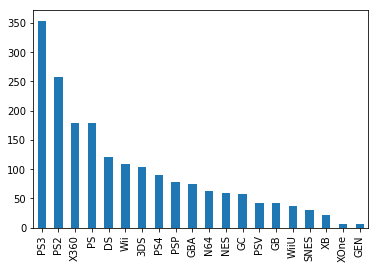

In [264]:
numGames.plot(kind="bar")

We can see that certain platforms have significantly more games than others. Let's now look at the number of total sales for the different platforms. We will undo the log transformation for this section of analysis for accurate sales numbers.

In [265]:
unlog = pd.DataFrame(df, copy=True)
unlog["Global_Sales"] = 10 ** df["Global_Sales"]
unlog["NA_Sales"] = 10 ** df["NA_Sales"]
unlog["EU_Sales"] = 10 ** df["EU_Sales"]
unlog["JP_Sales"] = 10 ** df["JP_Sales"]

The global sales of each platform are as follows:

In [267]:
grouped =unlog.groupby("Platform")["Global_Sales"].sum()
grouped.sort_values(axis=0, ascending= False, inplace=True, kind="quicksort", na_position="last")
grouped
#grouped.sort(columns="Global_Sales", axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

Platform
PS3     615.15
PS2     464.31
X360    451.47
DS      376.93
PS      315.68
Wii     289.10
PS4     195.09
GB      194.32
3DS     177.46
NES     172.99
N64     140.50
GBA     128.19
GC       96.32
SNES     92.28
PSP      85.88
WiiU     59.27
XB       31.24
PSV      20.57
GEN      19.62
XOne     18.10
Name: Global_Sales, dtype: float64

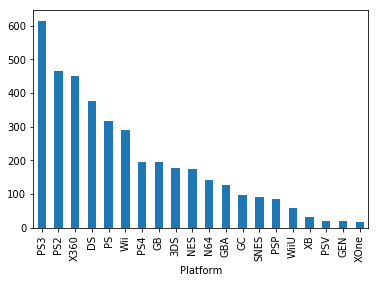

In [268]:
grouped.plot(kind = "bar")

We can see that although PS had more games than DS, DS games still had a higher sales total. Let's now calculate the average number of sales per game per platform.

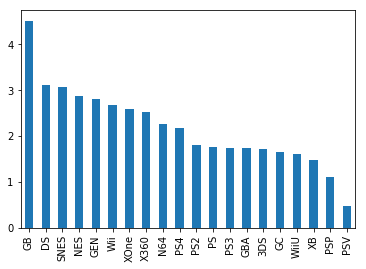

In [269]:
avgSales = grouped.divide(numGames)
avgSales.sort_values(axis=0, ascending= False, inplace=True, kind="quicksort", na_position="last")
avgSales.plot(kind = "bar")

Gameboy is noticeably higher than other platforms in terms of average sales. While there were only 43 Gameboy games, each Gameboy game sold very well (194.32 million total sales).

### Game Sales by Platform vs Region

Analyzing regional sales and platform sales leads us to analysis of a new relationship: platform sales vs region. Are certain platforms more successful in certain regions?

We can check this using a t test. Let's analyze Xbox 360 sales in NA and Japan.

We'll run a 2 sample t-test with a significance level of .05 with the following hypotheses:

H_0: NAXSales = JPXSales

H_A: NAXSales > JPXSales

In [270]:
x360 = df[df["Platform"] == "X360"]
NAX = x360["NA_Sales"]
JPX = x360["JP_Sales"]


In [271]:
NAX = x360["NA_Sales"]
JPX = x360["JP_Sales"]
t, p = ttest_ind(NAX,JPX)
p


1.0678434979302325e-86

Because our p value < alpha = .05, we reject the null hypothesis. The t test suggests statistically significant evidence towards Xbox 360 game sales being higher in NA than Japan. 

Even if an Xbox 360 game is successful in other regions, it does not sell well in Japan. This partially explains why the relationship between sales of other regions and Japanese sales have a low correlation.

But in order for this test's results to be valid, we need to check if our distributions are normal. 

0.000153289898169
0.000275710963583
Axes(0.125,0.125;0.775x0.755)


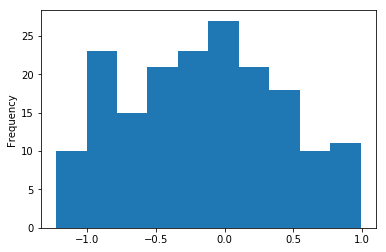

In [272]:
st_na, p_na = normaltest(NAX)
st_jp, p_jp = normaltest(JPX)
print(p_na)
print(p_jp)
print (NAX.plot(kind="hist"))


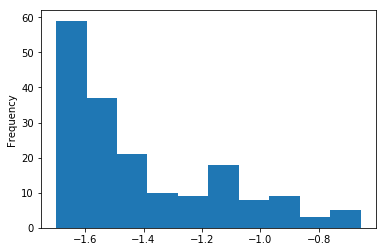

In [273]:
JPX.plot(kind="hist")

The test suggests that these distributions are not normal. Let's compare these histograms to normal curves.

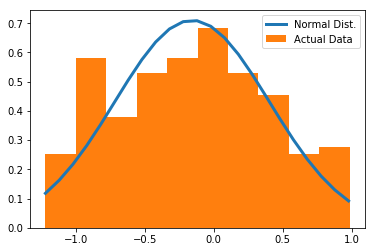

In [274]:
xs = np.arange(NAX.min(), NAX.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(NAX), np.std(NAX))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(NAX, normed=True, label='Actual Data');
plt.legend();

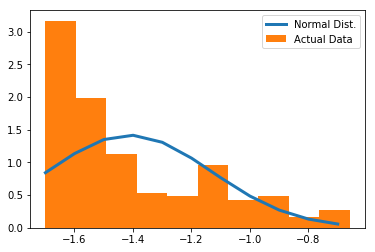

In [275]:
xs = np.arange(JPX.min(), JPX.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(JPX), np.std(JPX))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(JPX, normed=True, label='Actual Data');
plt.legend();

The NA xbox 360 sales are nearly normal, while JP xbox 360 are right skewed. Because these distributions are not normal, the results of our t-test are not entirely applicable.

### Genre Popularity

This section will focus on how genre affects the sales between the regions

Let's perform a chi square test comparing the average sales per genre with the following hypotheses:

H_0 = Means of each genre are equal

H_A = Means of each genre are not equal

Alpha = .05

In [276]:
grouped_genres = (unlog.groupby("Genre")["Global_Sales"]).mean()
grouped_genres.sort_values(axis=0, ascending= False, inplace=True, kind="quicksort", na_position="last")
grouped_genres

Genre
Platform        3.102428
Shooter         2.740966
Racing          2.732698
Misc            2.278571
Sports          1.971411
Action          1.897738
Role-Playing    1.761208
Simulation      1.754634
Puzzle          1.666667
Fighting        1.434400
Adventure       1.335536
Strategy        0.818000
Name: Global_Sales, dtype: float64

Chi square tests require all expected value counts to be greater than or equal to 5, so we will represent our data in terms of individual sales rather than in terms of millions of sales.

In [277]:
grouped_genres *= 1000000
grouped_genres

Genre
Platform        3.102428e+06
Shooter         2.740966e+06
Racing          2.732698e+06
Misc            2.278571e+06
Sports          1.971411e+06
Action          1.897738e+06
Role-Playing    1.761208e+06
Simulation      1.754634e+06
Puzzle          1.666667e+06
Fighting        1.434400e+06
Adventure       1.335536e+06
Strategy        8.180000e+05
Name: Global_Sales, dtype: float64

In [278]:
chisq, p = stats.chisquare(grouped_genres)

print("Because our p value of", p , "is less than alpha = .05, we reject the null.")
print("The average sales of games that are different genres are not equal.")

Because our p value of 0.0 is less than alpha = .05, we reject the null.
The average sales of games that are different genres are not equal.


### The Relationship Between Scores and Sales

For this section, we will be using our dataset that contains only games that have review scores present.

Global Sales vs Critic Scores Correlation is:  0.511747264018


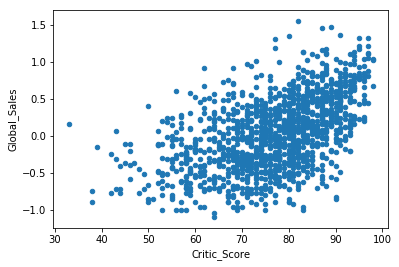

In [279]:
GlobalVsCritic = df_scores_clean.plot(x="Critic_Score", y = "Global_Sales",kind='scatter')
ScoreCorr = df_scores_clean.Global_Sales.corr(df_scores_clean.Critic_Score)


print("Global Sales vs Critic Scores Correlation is: " , ScoreCorr)


The correlation between global sales and critic score is a moderately strong positive correlation. 

Using a least squares polynomial fit, we can use the relationship between review scores and global sales to try to predict the number of sales a game might get given its review score.

In [280]:
a1,b1 = np.polyfit(df_scores_clean['Critic_Score'], df_scores_clean['Global_Sales'], 1)

In [281]:
pred50 = (a1* 50) + b1
pred50 = 10**(pred50)

pred80 = (a1* 80) + b1
pred80 = 10**(pred80)

pred95 = (a1* 95) + b1
pred95 = 10**(pred95)

print("We would predict that a game with a critic review score of 50 would sell", pred50, "million copies")
print("We would predict that a game with a critic review score of 80 would sell", pred80, "million copies")
print("We would predict that a game with a critic review score of 95 would sell", pred95, "million copies")

We would predict that a game with a critic review score of 50 would sell 0.279033554226 million copies
We would predict that a game with a critic review score of 80 would sell 1.26316173218 million copies
We would predict that a game with a critic review score of 95 would sell 2.68757272324 million copies


### Conclusion

We have explored, cleaned, and processed our dataset to find statistical correlations, some which were conclusive and some which were inconclusive.

Visualizing our data showed us that we must first "clean" our data as we see that our dataset skews heavily to one side. Once we take the log, we get a more even and clearer distribution. 

When we compared sales by region versus global sales, we can see a higher global sales correlation with North America and Europe than the correlation we get from global sales and Japan.

Then, we looked at sales by platform in different regions, and we saw that platforms successful in one region may be unsuccessful in other regions. 

Our analysis also told us that genres are not equal in terms of sales. Platformers and shooters sell much more than other genres such as strategy and adventure.  

Lastly, we found that global sales and critic scores have a positive correlation with one another. Using a polyfit model we were able to create a prediction of global sales given critic score.  


After analyzing our data, we realized that sales do indeed have a positive correlation with review scores. We also found that different genres have different popularity levels, and platforms have varying levels of success in different regions.

Wow!